In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### **Load data**

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

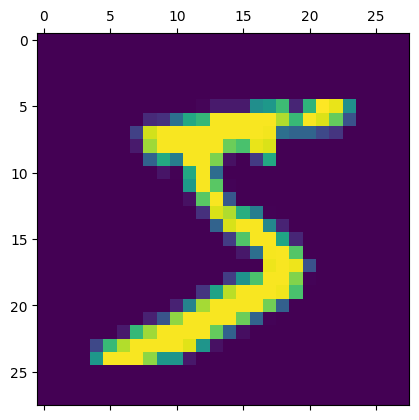

In [6]:
plt.matshow(X_train[0])

### **Feature Engineering**

**Normalize X_train and X_test to same size from 0 to 1**

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
classes = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'] 

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
classes[y_train[0]]

'five'

In [12]:
def plot_image(X, y, index):
    plt.figure(figsize= (7, 4))
    plt.matshow(X[index])
    plt.xlabel(classes[y[index]])

<Figure size 700x400 with 0 Axes>

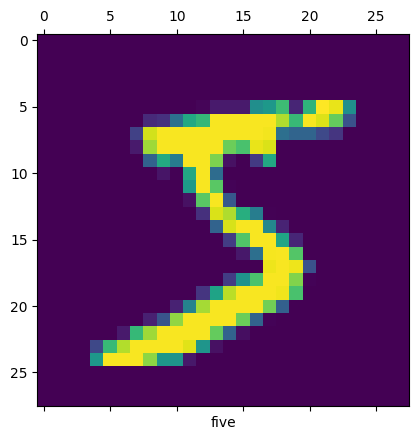

In [13]:
plot_image(X_train, y_train, 0)

### **Build the CNN**

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
cnn = keras.Sequential([
    # CNN
    keras.layers.Conv2D(filters = 28, kernel_size= (3,3), activation= 'relu', input_shape = (28, 28, 1), strides = (2, 2)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters = 56, kernel_size= (3,3), activation= 'relu', strides = (2, 2)),
    keras.layers.MaxPooling2D((2,2)),
    
    # Dense
    keras.layers.Flatten(), # size = 7*7*56 = 2744
    keras.layers.Dense(56, activation= 'relu'), 
    keras.layers.Dense(32, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(X_train, y_train, epochs= 10)

d:\Python Download\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7754 - loss: 0.7188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9551 - loss: 0.1458
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9649 - loss: 0.1116
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9723 - loss: 0.0885
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0766
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9773 - loss: 0.0675
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0574
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9823 - loss: 0.0553
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0485
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9862 - loss: 0.0437


In [16]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0944


[0.0786057710647583, 0.9775000214576721]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.6549287e-07, 1.3601139e-06, 2.1415517e-06, 1.7398161e-06,
        6.3675487e-09, 6.5922606e-08, 4.2270254e-14, 9.9999237e-01,
        8.6655257e-07, 1.0657334e-06],
       [9.3681486e-08, 3.6994386e-08, 9.9999952e-01, 1.4825794e-07,
        5.5747300e-08, 2.5356370e-10, 4.7898174e-10, 3.4569467e-09,
        3.3883524e-08, 1.3120238e-09],
       [6.7043347e-06, 9.9969077e-01, 5.1900656e-06, 3.4676309e-06,
        2.0038089e-04, 4.2626866e-07, 7.8035049e-07, 2.3253915e-05,
        1.2439125e-05, 5.6631226e-05],
       [9.9999464e-01, 5.1764171e-09, 1.6924918e-07, 3.6058589e-09,
        1.3259837e-07, 1.5674519e-07, 2.7111289e-06, 3.6108226e-08,
        7.5240331e-07, 1.4903171e-06],
       [5.8282006e-09, 1.0102335e-06, 8.1002245e-09, 2.7938885e-10,
        9.9999654e-01, 3.0315765e-09, 3.2519538e-09, 1.3513225e-06,
        1.1531284e-09, 1.1404621e-06]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

<Figure size 700x400 with 0 Axes>

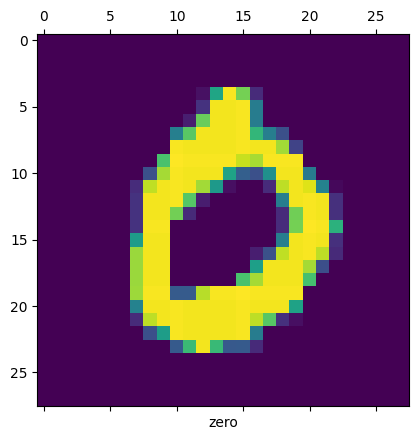

In [19]:
plot_image(X_test, y_test, 3)

In [20]:
classes[y_classes[3]]

'zero'

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

